## Exercise on decorators
Write a decorator called printer which causes any decorated function to print their return values with trailing and leading `***`. If the return value of a given function is None, printer should do nothing.

Apply the decorator to a function that takes a string in input and returns the number of characters in the string.

In [1]:
def printer(f):
    def inner_function(*args,**kwargs):
        res = f(*args,**kwargs)
        if res is not None:
            print("***"+str(res)+"***")
        return res
    return inner_function

In [2]:
@printer
def compute_length(s):
    return(len(s))

In [3]:
length = compute_length("Hi!")

***3***


## Exercise on generators
Define a generator that produces the Fibonacci series: https://en.wikipedia.org/wiki/Fibonacci_number

The series is defined on integer numbers as follows: $F_{n+2} = F_n+F_{n+1}$
The first numbers should be: 0,1,1,2,3,5,8

In [5]:
def fibonacci():
    """An infinite generator for the fibonacci series, where:
       Fib[0] = 0
       Fib[1] = 1
       Fib[n+2] = Fib[n] + Fib[n+1]
    """
    f1 = 0
    yield f1
    f2 = 1
    yield f2
    while True:
        f3 = f1 + f2
        yield f3
        f1 = f2
        f2 = f3

In [6]:
a=fibonacci()
for i in range(10):
    print(next(a))

0
1
1
2
3
5
8
13
21
34


## Exercise on creating your modules

Create a module that contains the definitions of a three of functions taking two parameters. The functions should return:
- the sum of the two numbers
- their difference
- their product

Write a separate script that imports the module. The script should
1. read two numbers from the prompt
2. call one by one the functions defined in the imported module with the two read numbers as parameters
3. print the output of the tree functions in the terminal

In [ ]:
# see separate files called ex_funct.py and ex_script.py

## Exercise 1 on Monte Carlo methods

Generate a series of data between 0 and $\pi$ whose distribution function follows:

$f(x) = \sin(x)/2$

Do it using first the transformation method, then the direct method.

Check your results with an histogram.

C:\Users\ecica\AppData\Local\Temp\ipykernel_10424\1732700250.py:6: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(1-2*y)


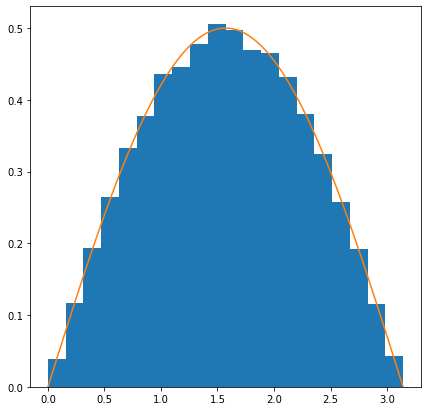

In [7]:
import numpy as np
import matplotlib.pyplot as plt 

#with inversion
def inverse_cdf(y):
    return np.arccos(1-2*y)

Y = np.random.uniform(0,np.pi,100000)

X = inverse_cdf(Y)

fig,ax = plt.subplots(figsize=(7,7))
plt.hist(X, bins=20,range=(0, np.pi), density=True)
xs = np.linspace(0, np.pi, 100)
plt.plot(xs,np.sin(xs)*0.5)
plt.show()

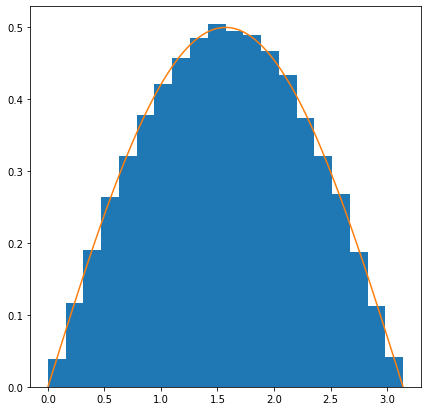

In [8]:
#with rejection
N=100000
XRAND = np.random.uniform(0,np.pi,N)
YRAND = np.random.uniform(0,0.5, N)

filt = YRAND < np.sin(XRAND)/2


fig,ax = plt.subplots(figsize=(7,7))
plt.hist(XRAND[filt], bins=20,range=(0, np.pi), density=True)
xs = np.linspace(0, np.pi, 100)
plt.plot(xs,np.sin(xs)*0.5)
plt.show()

## Exercise 2 on Monte Carlo Methods

Use the Monte Carlo rejection method to compute the area of a circle enclosed in a square. The radius of the circle should be equal to 1.
Visualize your methodology.

3.13958 3.141592653589793


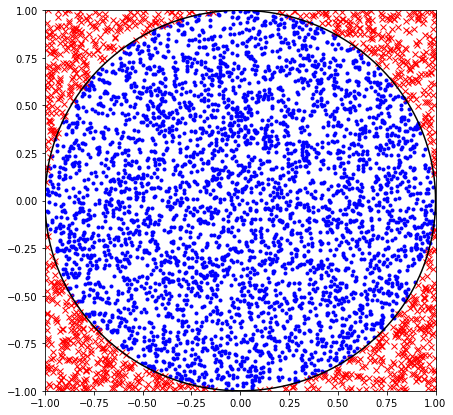

In [9]:
N=1000000
XRAND = np.random.uniform(-1,1,N)
YRAND = np.random.uniform(-1,1, N)

filt = XRAND**2+YRAND**2 < 1

print(4.*len(XRAND[filt])/len(XRAND), np.pi)

N=5000
XRAND = np.random.uniform(-1,1,N)
YRAND = np.random.uniform(-1,1, N)

filt = XRAND**2+YRAND**2 < 1
fig,ax = plt.subplots(figsize=(7,7))
plt.plot(XRAND[filt], YRAND[filt], "b.")
plt.plot(XRAND[~filt], YRAND[~filt], "rx")
theta = np.linspace(0, 2*np.pi, 200)
plt.plot(np.cos(theta),np.sin(theta), "-k")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

## Exercise 3 on Monte Carlo Methods

Generate a set of data that is distributed as $f(x)\propto x^{-\alpha}$ between $x_{\rm min}$ and $x_{\rm max}$.

$\alpha \neq 1$, $x_{\rm min}>0$ and $x_{\rm max}>x_{\rm min}$ should be parameters that can be changed; the normalization should be readjusted at each change in the parameters.

Select autonomously the kind of method that best suites your problem.

Plot an histogram to compare the obtained distribution to the theoretical one

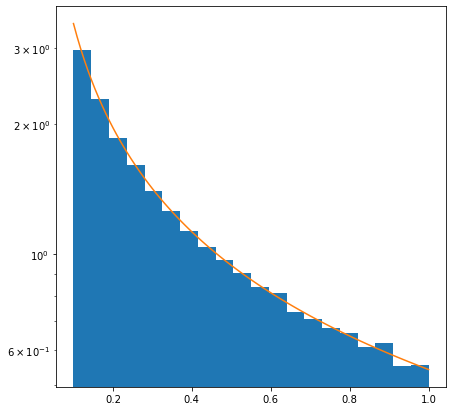

In [10]:
def generate_power_distr(x, alpha, mmin, mmax):
    beta = -alpha+1.
    N = beta / (mmax**beta -mmin**beta)
    return (beta/N * x + mmin**beta )**(1./beta)

xmin=0.1
xmax=1.
alpha=.8

Y = np.random.uniform(0,1,100000)

X = generate_power_distr(Y, alpha, xmin, xmax)

fig,ax = plt.subplots(figsize=(7,7))
plt.yscale("log")
plt.hist(X, bins=20,range=(xmin, xmax), density=True)
xs = np.linspace(xmin, xmax, 100)
plt.plot(xs,( (1-alpha) / (xmax**(1-alpha) -xmin**(1-alpha)))*xs**-alpha)
plt.show()